In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# Perceptron simples

class Perceptron:

    def __init__(self, input_size):
        self.weigths = np.zeros(input_size) # inicializa com um vetor de zeros
        self.bias = 0 # inicializa o bias com 0

    def output(self, inputs):
        summaiton = np.dot(inputs, self.weigths) + self.bias
        return 1 if summaiton >= 0 else 0
    
    def train(self, training_inputs, labels, epochs=10, learning_rate=1):
        for _ in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                predction = self.output(inputs) # saída da rede
                self.weigths += learning_rate * (label - predction) *inputs # calculo dos pesos
                print(f"Error --> ", label - predction)
                self.bias += learning_rate * (label - predction)
    

In [34]:
# Porta lógica AND

entradas = np.array([[0,0], [0,1], [1,0], [1,1]])
saida_desejada = np.array([0,0,0,1])

In [35]:
perceptron = Perceptron(input_size=2)
perceptron.train(entradas, saida_desejada, epochs=10, learning_rate=0.6)

Error -->  -1
Error -->  0
Error -->  0
Error -->  1
Error -->  -1
Error -->  -1
Error -->  0
Error -->  1
Error -->  0
Error -->  -1
Error -->  -1
Error -->  1
Error -->  0
Error -->  0
Error -->  -1
Error -->  1
Error -->  0
Error -->  -1
Error -->  0
Error -->  0
Error -->  0
Error -->  0
Error -->  0
Error -->  0
Error -->  0
Error -->  0
Error -->  0
Error -->  0
Error -->  0
Error -->  0
Error -->  0
Error -->  0
Error -->  0
Error -->  0
Error -->  0
Error -->  0
Error -->  0
Error -->  0
Error -->  0
Error -->  0


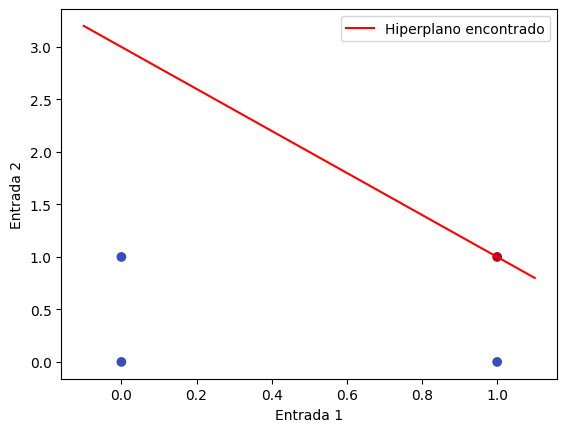

In [36]:
# Função do hiperplano

def plot_hiperplane(w, b):
    x = np.linspace(-0.1, 1.1, 100)
    y = (-b - w[0] * x)/w[1]
    plt.plot(x,y, 'r-', label='Hiperplano encontrado')


plot_hiperplane(perceptron.weigths, perceptron.bias)
plt.scatter(entradas[:,0], entradas[:, 1], c = saida_desejada, cmap='coolwarm')
plt.xlabel('Entrada 1')
plt.ylabel('Entrada 2')
plt.legend()
plt.show()

In [42]:
import tensorflow as tf


modelo = tf.keras.Sequential([tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=(2,))])
modelo.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [58]:
# criando modelo

modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

# Treinando o modelo

modelo.fit(entradas, saida_desejada, epochs=30)

predicoes = modelo.predict(entradas)
print(predicoes)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.7728 - mse: 0.2637
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.7725 - mse: 0.2636
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.7721 - mse: 0.2635
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.7718 - mse: 0.2634
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.7715 - mse: 0.2633
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.7712 - mse: 0.2632
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.7709 - mse: 0.2631
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.7705 - mse: 0.2630
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.7702 - mse: 0.2629
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.7699 - mse: 0.2628
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.7696 - mse: 0.2626
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.7693 - mse: 0.2625
Epoch 13/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.768

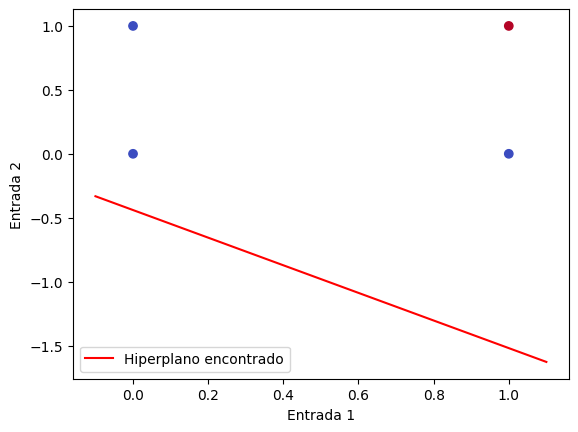

In [59]:
pesos = modelo.get_weights()[0]
bias = modelo.get_weights()[1]


plot_hiperplane(pesos,bias)
plt.scatter(entradas[:,0], entradas[:, 1], c = saida_desejada, cmap='coolwarm')
plt.xlabel('Entrada 1')
plt.ylabel('Entrada 2')
plt.legend()
plt.show()